In [ ]:
# import np, pd and matplotlib and seaborn
import numpy as np  # type: ignore
import pandas as pd  # type: ignore
import matplotlib.pyplot as plt  # type: ignore
import seaborn as sns  # type: ignore

## Data Cleaning


### Data Reading & Data Types


In [46]:
# Read the data in pandas
inp0 = pd.read_csv(
    r"C:\ZTalJaZ\Storage\MasterOfDataScience\Data-Sources\Data_Toolkits\Graded_DressAttribute.csv"
)
inp1 = pd.read_csv(
    r"C:\ZTalJaZ\Storage\MasterOfDataScience\Data-Sources\Data_Toolkits\Graded_DressSales.csv"
)

You have “Attribute DataSet” which contains a column named “Price”. Choose the correct statement from the following about its data type and variable type.

- Integer type and numerical variable
- Object type and categorical ordinal variable
- Object type and categorical nominal variable
- Float type and categorical variable.


There is another column in “Attribute DataSet” named as “Recommendation”, choose the correct statement about its data type and variable type.

- Integer type and categorical
- Object type and categorical
- Integer type and continuous numerical
- Object type only.


Which of the following column do you think are of no use in “Attribute DataSet”.

- Dress_ID
- Price
- Size and material
- NeckLine
- None of the above


In [ ]:
# Print the information about the attributes of inp0 and inp1.
display(inp0.info())
display(inp1.info())

### Fixing the Rows and Columns


As you can see, there is a column in “Attribute Dataset” named as ‘Size’. This column contains the values in abbreviation format. Write a code in Python to convert the followings:

- M into “Medium”
- L into “Large”
- XL into “Extra large”
- free into “Free”
- S, s & small into “Small”.

Now once you are done with changes in the dataset, what is the value of the lowest percentage, the highest percentage and the percentage of Small size categories in the column named “Size”?


In [47]:
# Column fixing, correcting size abbreviation. count the percentage of each size category in "Size" column.
inp0["Size"] = inp0["Size"].replace(
    {
        "free": "Free",
        "S": "Small",
        "M": "Medium",
        "L": "Large",
        "XL": "Extra Large",
        "s": "Small",
        'small': "Small",
    }
)

# Count the percentage of each size category in "Size" column.
inp0["Size"].value_counts(normalize=True) * 100

Size
Medium         35.699374
Free           34.446764
Large          19.415449
Small           7.515658
Extra Large     2.922756
Name: proportion, dtype: float64

In [ ]:
# Print the value counts of each category in "Size" column.
inp0["Size"].value_counts()

### Impute/Remove Missing values


In [ ]:
# Print the null count of each variables of inp0 and inp1.

display(inp0.isnull().sum())
display(inp1.isnull().sum())

You are given another dataset named “Dress Sales”. Now if you observe the datatypes of the columns using ‘inp1.info()’ command, you can identify that there are certain columns defined as object data type though they primarily consist of numeric data.

Now if you try and convert these object data type columns into numeric data type(float), you will come across an error message. Try to correct this error.


In [ ]:
# Print the data types information of inp1 i.e. "Dress Sales" data.
inp1.info()

In [ ]:
# Try to convert the object type into float type of data. YOU GET ERROR MESSAGE.
# inp1['09-12-2013'] = inp1['09-12-2013'].astype(float)

In [ ]:
# Do the required changes in the "Dress Sales".csv data set to get null values on string values.
inp1 = inp1.replace(" ", np.nan)

In [ ]:
# Convert the object type columns in "Dress Sales".csv into float type of data type.
object_columns = inp1.select_dtypes(include=["object"]).columns

# Loop through the identified object columns
for col in object_columns:
    # Attempt to convert the column to numeric, coercing errors
    # 'coerce' will replace values that cannot be converted (like '', 'Orders', 'Removed') with NaN
    # This automatically handles missing values represented as empty strings and specific non-numeric strings
    inp1[col] = pd.to_numeric(inp1[col], errors="coerce")

print(inp1.info())

When you see the null counts in “Dress Sales” dataset after performing all the operations that have been mentioned in jupyter notebook, you will find that there are some columns in “Dress Sales” data where there are more than 40% of missing values. Based on your understanding of dealing with missing values do the following steps.


In [ ]:
# Print the null percetange of each column of inp1.
display(inp1.isnull().sum() / inp1.shape[0] * 100)

In [ ]:
# Drop the columns in "Dress Sales" which have more than 40% of missing values.
inp1 = inp1.dropna(thresh=0.6 * inp1.shape[0], axis=1)

print(inp1.info())

You should categorise the dates into seasons in “Dress Sales” data to simplify the analysis according to the following criteria:

- June, July and August: Summer.
- September, October and November: Autumn.
- December, January and February: WInter.
- March, April and May: Spring.


In [48]:
# Create the four seasons columns in inp1, according to the above criteria.
object_columns = inp1.select_dtypes(include=["object"]).columns
if "Dress_ID" in object_columns:
    object_columns = object_columns.drop("Dress_ID")  # Exclude Dress_ID if it's object

# Loop through the identified object columns and convert
for col in object_columns:
    inp1[col] = pd.to_numeric(inp1[col], errors="coerce")

# --- End: Code from previous step ---


# Function to map month number to season
def get_season(month):
    if month in [6, 7, 8]:
        return "Summer"
    elif month in [9, 10, 11]:
        return "Autumn"
    elif month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    else:
        return "Unknown"  # Should not happen with valid dates


# Get all column names except 'Dress_ID'
date_columns = [col for col in inp1.columns if col != "Dress_ID"]

# Create dictionaries to store columns for each season
season_columns = {"Spring": [], "Summer": [], "Autumn": [], "Winter": []}

# Categorize columns by season
for col in date_columns:
    try:
        # Extract month from column name (assuming DD-MM-YYYY format)
        date_obj = pd.to_datetime(col, format="%d-%m-%Y")
        month = date_obj.month
        season = get_season(month)
        if season != "Unknown":
            season_columns[season].append(col)
    except ValueError:
        print(f"Warning: Could not parse date from column name: {col}. Skipping.")

# Calculate total sales for each season and add as new columns
# Use fillna(0) before summing if you want NaN to definitively count as 0 sales
# Otherwise, sum() handles NaN by skipping them (sum of NaNs is NaN unless skipna=False)
for season, cols in season_columns.items():
    if cols:  # Check if there are any columns for this season
        inp1[f"{season}_Sales"] = inp1[cols].sum(axis=1, skipna=True)
    else:
        inp1[f"{season}_Sales"] = 0  # Assign 0 if no columns found for a season

# Select and display the Dress_ID and the new seasonal sales columns
seasonal_summary = inp1[
    ["Dress_ID", "Spring_Sales", "Summer_Sales", "Autumn_Sales", "Winter_Sales"]
]

In [49]:
# calculate the sum of sales in each seasons in inp1 i.e. "Dress Sales".

# print sum all sales in each seasons in inp1 i.e. "Dress Sales".
seasonal_summary_sum = seasonal_summary[
    ["Spring_Sales", "Summer_Sales", "Autumn_Sales", "Winter_Sales"]
].sum()

seasonal_summary_sum = seasonal_summary_sum.reset_index()
seasonal_summary_sum.columns = ["Season", "Total_Sales"]
seasonal_summary_sum["Total_Sales"] = seasonal_summary_sum["Total_Sales"].astype(float)

print(seasonal_summary_sum)

         Season  Total_Sales
0  Spring_Sales     199084.0
1  Summer_Sales     749797.0
2  Autumn_Sales    1551540.0
3  Winter_Sales     529149.0


Now let's merge inp1 with inp0 with left join manner, so that the information of inp0 should remain intact.


In [ ]:
# Merge inp0 with inp1 into inp0. this is also called left merge.
inp0 = pd.merge(
    left=inp0, right=inp1, how="left", left_on="Dress_ID", right_on="Dress_ID"
)
inp0.head()

In [ ]:
# Now Drop the Date columns from inp0 as it is already combined into four seasons.
inp0.drop(inp0.loc[:, "29-08-2013":"10-12-2013"].columns, axis=1, inplace=True)
inp0.isnull().sum()

Print the null count of inp0 to get the idea about the missing values in data set.


In [ ]:
# Print the null count of each columns in inp0 dataframe i.e. combined data frame of inp0 and inp1 without date columns.
display(inp0.isnull().sum())

You can see that there are two types of variables one with a large number of missing values and another is very less number of missing values. These two columns can be categorized as:

Type-1: Missing values are very less (around 2 or 3 missing values): Price, Season, NeckLine, SleeveLength, Winter and Autumn.

Type-2: Missing values are large in numbers (more than 15%): Material, FabricType, Decoration and Pattern Type.


In [ ]:
# Deal with the missing values of Type-1 columns: Price, Season, NeckLine, SleeveLength, Winter and Autumn.
# Price is Low, Average, High values. So, we can fill the missing values with the mode of the column.
inp0["Price"].fillna(inp0["Price"].mode()[0], inplace=True)
# Season is Summer, Autumn, Winter, Spring. So, we can fill the missing values with the mode of the column.
inp0["Season"].fillna(inp0["Season"].mode()[0], inplace=True)
# So, we can fill the missing values with the mode of the column.
inp0["NeckLine"].fillna(inp0["NeckLine"].mode()[0], inplace=True)
# SleeveLength is Full, Half, Sleeveless. So, we can fill the missing values with the mode of the column.
inp0["SleeveLength"].fillna(inp0["SleeveLength"].mode()[0], inplace=True)
# Winter is 0, 1. So, we can fill the missing values with the mode of the column.
inp0["Winter_Sales"].fillna(inp0["Winter_Sales"].mode()[0], inplace=True)
# Autumn is 0, 1. So, we can fill the missing values with the mode of the column.
inp0["Autumn_Sales"].fillna(inp0["Autumn_Sales"].mode()[0], inplace=True)

In [ ]:
# Deal with the missing values for Type-2 columns: Material, FabricType, Decoration and Pattern Type.
# drop values in Material, FabricType, Decoration and Pattern Type columns.
inp0.dropna(subset=["Material", "FabricType", "Decoration", "Pattern Type"], inplace=True)

### Standardise value


In the given dataset, there are certain discrepancies with the categorical names such as irregular spellings. Choose the correct option of columns with irregular categories and update them.

- Season, NeckLine
- Price, Material
- fabricType, Decoration
- Season, SleeveLength


In [ ]:
display(inp0["Season"].value_counts().index.tolist())

In [ ]:
# correcting the spellings.
inp0["NeckLine"] = inp0["NeckLine"].replace(
    {
        "o-neck": "O-Neck",
        "v-neck": "V-Neck",
        "slash-neck": "Slash-Neck",
        "boat-neck": "Boat-Neck",
        "Sweetheart": "Sweet Heart",
        "turndowncollor": "Turndown Collar",
        "bowneck": "Bow Neck",
        "peterpan-collor": "Peter Pan Collar",
        "sqare-collor": "Square Collar",
        "open": "Open Neck",
        "Scoop": "Scoop Neck",
        "ruffled": "Ruffled Neck",
        "mandarin-collor": "Mandarin Collar",
        "sweetheart": "Sweet Heart",
        "halter": "Halter Neck",
        "backless": "Backless Neck",
    }
)

inp0["Season"] = inp0["Season"].replace(
    {
        "Spring": "Spring",
        "Autumn": "Autumn",
        "Summer": "Summer",
        "Winter": "Winter",
        "spring": "Spring",
        "autumn": "Autumn",
        "summer": "Summer",
        "winter": "Winter",
    }
)
inp0["FabricType"] = inp0["FabricType"].replace(
    {
        "chiffon": "Chiffon",
        "tulle": "Tulle",
        "satin": "Satin",
        "jersey": "Jersey",
        "denim": "Denim",
        "cotton": "Cotton",
        "rayon": "Rayon",
        "polyester": "Polyester",
        "lace": "Lace",
        "silk": "Silk",
        # 'other': 'Other',
    }
)

inp0["Decoration"] = inp0["Decoration"].replace(
    {
        "beading": "Beading",
        "embroidery": "Embroidery",
        "ruffles": "Ruffles",
        "lace": "Lace",
        "appliques": "Appliques",
        "bow": "Bow",
        "button": "Button",
        # 'other': 'Other',
    }
)
inp0["Pattern Type"] = inp0["Pattern Type"].replace(
    {
        "solid": "Solid",
        "striped": "Striped",
        "floral": "Floral",
        "polka dot": "Polka Dot",
        "animal": "Animal",
        "geometric": "Geometric",
        # 'other': 'Other',
    }
)

In [ ]:
# correcting the Spellings.

## Univariate Analysis


### Categorical Unordered Univariate Analysis


There is a column named ‘Style’ in ‘Attribute Dataset’ which consists of the different style categories of the women apparels. Certain categories whose total sale is less than 50000 across all the seasons is considered under one single category as ‘Others’.


Which of the following categories in ‘Style’ column can be grouped into ‘Others’ category? and perform the grouping operation in the notebook for further analysis.

- Flare, fashion
- Novelty, bohemian
- OL, fashion, work
- Novelty, fashion, Flare


In [ ]:
# Group "Style" categories into "Others" which have less than 50000 sales across all the seasons.
# # Total sales
inp0["Total_Sales"] = (
    inp0["Spring_Sales"]
    + inp0["Summer_Sales"]
    + inp0["Autumn_Sales"]
    + inp0["Winter_Sales"]
)

# Replace categories with less than 50000 sales with "Others"
inp0.loc[inp0["Total_Sales"] < 50000, "Style"] = "Others"

# # Grpup by "Style" and sum the sales
inp0_grouped = inp0.groupby("Style").sum(numeric_only=True).reset_index()

display(inp0_grouped.head(10))

What is the percentage of “cute” and “Others” category in “Style” column in “Attribute DataSet” respectively?

- 46%, 5%
- 9%, 2.1%
- 2.1%, 5%
- 13.8%, 9%


In [ ]:
# Calculate the percentage of each categories in the "Style" variable.
inp0["Style"].value_counts(normalize=True) * 100

Similarly Club Neckline, SLeeve length categories into "Others" which have less than 50000 sales across all the seasons.


In [ ]:
# Group "Neckline" categories into "Others" which have less than 50000 sales across all the seasons.

inp0["NeckLine"] = inp0.loc[inp0["Total_Sales"] < 50000, "NeckLine"] = "Others"

inp0["NeckLine"].value_counts()

In [ ]:
# Group "Sleeve length" categories into "Others" which have less than 50000 sales across all the seasons.
inp0["SleeveLength"] = inp0.loc[inp0["Total_Sales"] < 50000, "SleeveLength"] = "Others"
inp0["SleeveLength"].value_counts()

Club material, fabrictype, patterntype and decoration categories into "Others" which have less than 25000 sales across all the seasons


In [ ]:
# Group "material" categories into "Others" which have less than 25000 sales across all the seasons.
inp0["Material"] = inp0.loc[inp0["Total_Sales"] < 25000, "Material"] = "Others"
inp0["Material"].value_counts()

In [ ]:
# Group "fabric type" categories into "Others" which have less than 25000 sales across all the seasons.
inp0["FabricType"] = inp0.loc[inp0["Total_Sales"] < 25000, "FabricType"] = "Others"
inp0["FabricType"].value_counts()

In [ ]:
# Group "patern type" categories into "Others" which have less than 25000 sales across all the seasons.
inp0["Pattern Type"] = inp0.loc[inp0["Total_Sales"] < 25000, "Pattern Type"] = "Others"
inp0["Pattern Type"].value_counts()

In [ ]:
# Group "decoration" categories into "Others" which have less than 25000 sales across all the seasons.

inp0["Decoration"] = inp0.loc[inp0["Total_Sales"] < 25000, "Decoration"] = "Others"
inp0["Decoration"].value_counts()

### Caregorical Ordered Univariate Analysis


Which of the following is an unordered variable in “Attribute DataSet”.

- Style
- Price
- Season
- Size


### Numerical variable Univariate analysis:


What is the approximate difference between the maximum value and 75th percentile in “Autumn” column.

- Approx 54000
- Approx 55000
- Approx 52000
- Approx 50000


In [ ]:
# Describe the numerical variale: "Autumn".
inp0["Autumn_Sales"].describe().loc['max'] - inp0["Autumn_Sales"].describe().loc['75%']

In [ ]:
# plot the boxplot of "Autumn" column.
plt.figure(figsize=(10, 6))
sns.boxplot(x=inp0["Autumn_Sales"])
plt.title("Boxplot of Autumn Sales")
plt.xlabel("Autumn Sales")
plt.show()

Which of the following season has the highest difference between the maximum value and 99th quantile of sales?

- Winter
- Summer
- Spring
- Autumn


In [ ]:
# Find the maximum and 99th percentile of Winter season.
inp0["Winter_Sales"].max(), inp0["Winter_Sales"].quantile(0.99)

In [ ]:
# Find the maximum and 99th percentile of Summer season.
inp0["Summer_Sales"].max(), inp0["Summer_Sales"].quantile(0.99)

In [ ]:
# Find the maximum and 99th percentile of Spring season.
inp0["Spring_Sales"].max(), inp0["Spring_Sales"].quantile(0.99)

In [ ]:
# Find the maximum and 99th percentile of Autumn season.
inp0["Autumn_Sales"].max(), inp0["Autumn_Sales"].quantile(0.99)

## Bivariate Analysis


### Numerical- Categorical analysis


Which of the following “Price” category has the lowest average value of rating?

- very-high
- Medium
- Low
- High


In [ ]:
# Find the Mean of Ratings for each Price category.
inp0.groupby("Price")["Rating"].mean().reset_index().sort_values(
    by="Rating", ascending=False
)

What is the median of the rating of “vintage” category in Style column?

- 4.6
- 4.7
- 4.55
- 0.00


In [ ]:
# Find the median of Ratings for each Style category.
inp0.groupby("Style")["Rating"].median().reset_index().sort_values(
    by="Rating", ascending=False
)

Which of the following season has the highest average value of sale for “Recommendation” value equals to 1.

- Summer
- Spring
- Autumn
- Winter


In [ ]:
# Summer sale vs Recommendation.
inp0.groupby("Recommendation")["Summer_Sales"].mean().reset_index().sort_values(
    by="Summer_Sales", ascending=False
)

In [ ]:
# Spring sale vs Recommendation.
inp0.groupby("Recommendation")["Spring_Sales"].mean().reset_index().sort_values(
    by="Spring_Sales", ascending=False
)

In [ ]:
# Autumn sale vs Recommendation.
inp0.groupby("Recommendation")["Autumn_Sales"].mean().reset_index().sort_values(
    by="Autumn_Sales", ascending=False
)

In [ ]:
# Winter sale vs Recommendation.
inp0.groupby("Recommendation")["Winter_Sales"].mean().reset_index().sort_values(
    by="Winter_Sales", ascending=False
)

### Categorical categorical bivariate analysis


Which of the following size categories has the highest positive recommendations?

- Medium and extra large
- Extra large and small
- Free and small
- Free and medium


In [ ]:
# Size vs Recommendation.
inp0.groupby("Size")["Recommendation"].mean().reset_index().sort_values(
    by="Recommendation", ascending=False
)

### Multivariate analysis


Which of the following pair of “Style” and “Price” category has the highest average of positive recommendations?

- Price: medium and style: vintage
- Price: medium and style: cute
- Price: very high and style: party
- Price: low and style: sexy


In [ ]:
# plot the heat map of Style, price and Recommendation.
# Which of the following pair of “Style” and “Price” category has the highest average of positive recommendations?
plt.figure(figsize=(12, 8))
sns.heatmap(
    inp0.pivot_table(
        index="Style",
        columns="Price",
        values="Recommendation",
        aggfunc="mean",
    ),
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
)
plt.title("Heatmap of Style and Price vs Recommendation")
plt.xlabel("Price")
plt.ylabel("Style")
plt.show()


Which of the following material type has no recommendation in summer and winter seasons?

- Mix and Milksilk
- Nylon and Rayon
- Microfiber and Silk
- Milksilk and Microfiber


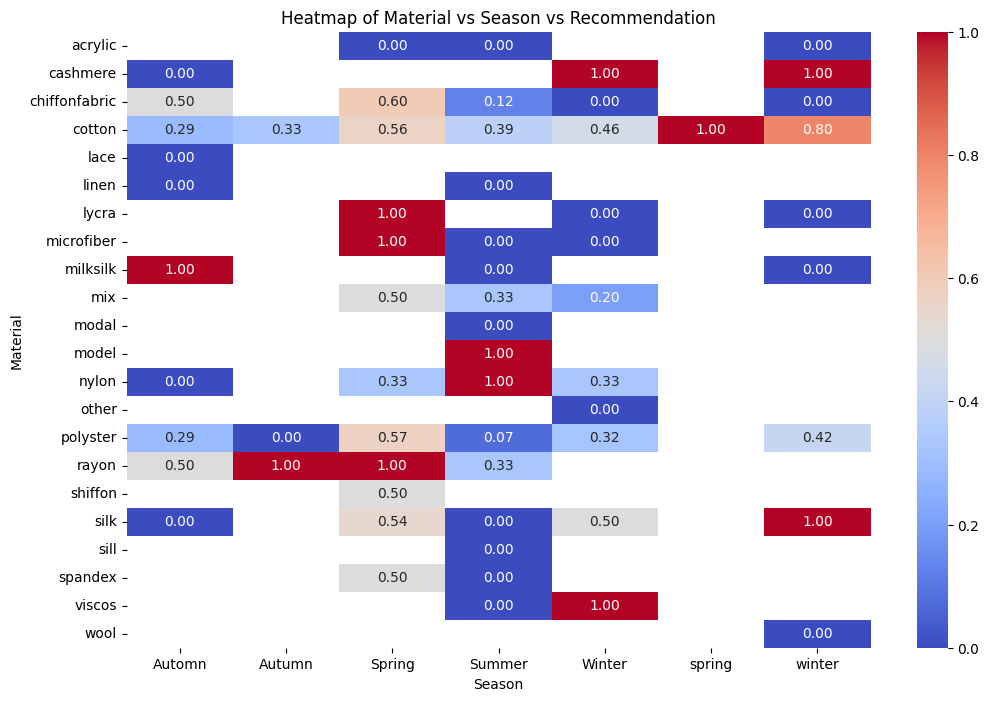

In [50]:
# plot the heat map of Season, material and Recommendation.
# Which of the following material type has no recommendation in summer and winter seasons?
plt.figure(figsize=(12, 8))
sns.heatmap(
    inp0.pivot_table(
        index="Material",
        columns="Season",
        values="Recommendation",
        aggfunc="mean",
    ),
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
)
plt.title("Heatmap of Material vs Season vs Recommendation")
plt.xlabel("Season")
plt.ylabel("Material")
plt.show()